# Road Signs classification

---

## 1. Environment Preparation

In [207]:
import  numpy as np
import pandas as pd
import tensorflow.keras as keras

random_seed = 42

In [208]:
train_data_path = "Data/archive/Train"

---

## 2. Data Loading & Augmentation

In [209]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    rotation_range=10,
    brightness_range=[0.9, 1.1],
    validation_split=0.2,
)
train = train_datagen.flow_from_directory(
    train_data_path,
    subset="training",
    seed=random_seed,
    shuffle=True,
    interpolation="bicubic",
    batch_size=32,
    target_size=(64, 64),
)
val = train_datagen.flow_from_directory(
    train_data_path,
    subset="validation",
    seed=random_seed,
    shuffle=True,
    interpolation="bicubic",
    batch_size=32,
    target_size=(64, 64),
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


The size of the train images: (32, 64, 64, 3)


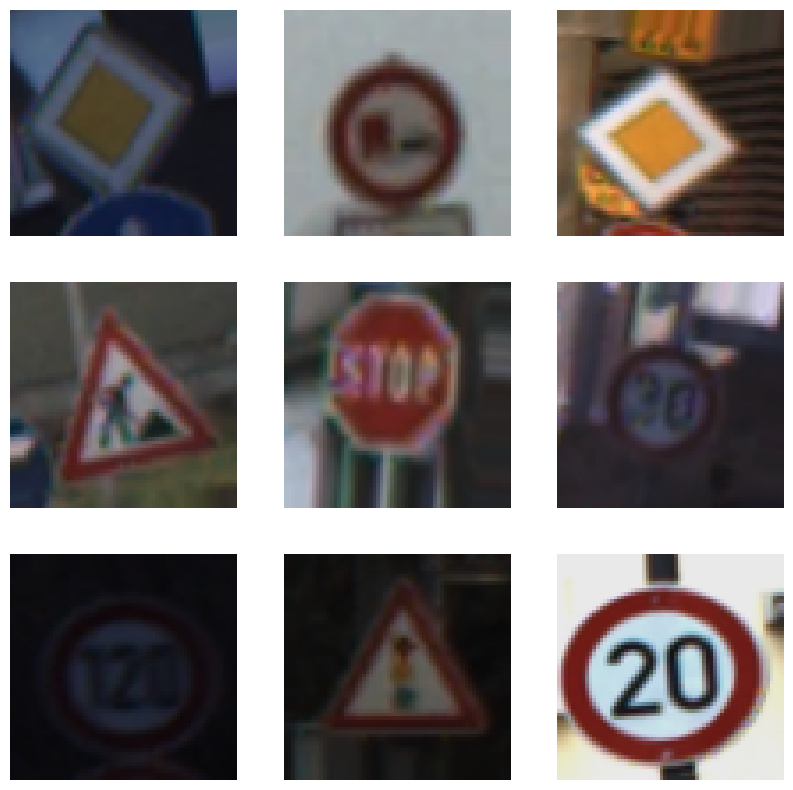

In [210]:
import matplotlib.pyplot as plt
# %% Plotting the images with the label:
train_selector = next(train)

print(f'The size of the train images: {train_selector[0].shape}')
numbers = 9 # Any perfect square number
i = 1

plt.figure(figsize=(10, 10))

for (label, image) in enumerate(train_selector[0][: numbers]):
    plt.subplot(np.sqrt(numbers).astype('int64'), np.sqrt(numbers).astype('int64'), i)
    plt.imshow(image.astype('int64'))
    plt.axis('off')
    i += 1
plt.show()

---

## 3. Model Building & Compiling

In [211]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Rescaling

# %% Building the CNN Architecture for the Prediction:

model = Sequential([
    
    Rescaling(1.0/255.0, input_shape=(64, 64, 3)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    #GlobalAveragePooling2D(),
    Flatten(),
    
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=43, activation='softmax')
])


print(model.summary())

/mnt/Files/Sorbonne_Data_Analytics_SDA/Cours/Deep_Learning_Dafnis-Krasniqi/Road_Signs_Deep_Learning_Classification/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 31, 31, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,715 (768.42 KB)

 Trainable params: 196,235 (766.54 KB)

 Non-trainable params: 480 (1.88 KB)

None


In [212]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [213]:
import tensorflow as tf

# List all physical devices (including GPUs)
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"GPUs detected: {len(gpus)}")
    for i, gpu in enumerate(gpus):
        print(f"GPU {i}: {gpu}")
else:
    print("No GPU detected.")


No GPU detected.


In [214]:
history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10


/mnt/Files/Sorbonne_Data_Analytics_SDA/Cours/Deep_Learning_Dafnis-Krasniqi/Road_Signs_Deep_Learning_Classification/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



981/981 ━━━━━━━━━━━━━━━━━━━━ 117s 114ms/step - accuracy: 0.5140 - loss: 1.6450 - val_accuracy: 0.8389 - val_loss: 0.5215
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 112s 114ms/step - accuracy: 0.9230 - loss: 0.2387 - val_accuracy: 0.8581 - val_loss: 0.5187
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 112s 113ms/step - accuracy: 0.9547 - loss: 0.1417 - val_accuracy: 0.8736 - val_loss: 0.4467
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 112s 113ms/step - accuracy: 0.9639 - loss: 0.1142 - val_accuracy: 0.9277 - val_loss: 0.2758
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 111s 113ms/step - accuracy: 0.9739 - loss: 0.0895 - val_accuracy: 0.9292 - val_loss: 0.2649
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 105s 107ms/step - accuracy: 0.9745 - loss: 0.0816 - val_accuracy: 0.9413 - val_loss: 0.2088
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9788 - loss: 0.0729 - val_accuracy: 0.8406 - val_loss: 0.6100
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 91s 93ms/step - accuracy: 0.9792 - loss: 0.0722 -

Max val_acc 0.9417166113853455


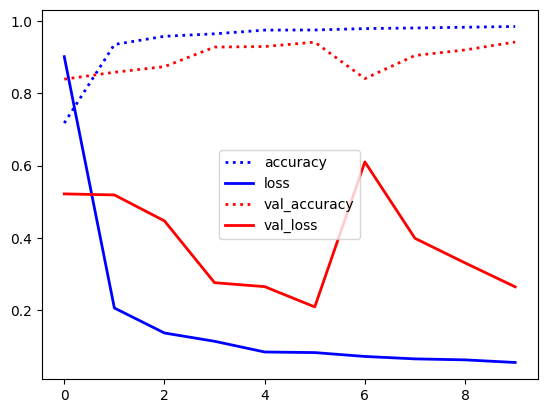

In [215]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(lw=2,style=['b:','b-','r:','r-']);
print("Max val_acc",np.max(history.history['val_accuracy']))


In [216]:
train.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

---

## 4. Model Evaluation

In [217]:
test_path = "Data/archive/Test"
test_df = pd.read_csv("Data/archive/Test.csv")
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [218]:
test_df=test_df[['Path','ClassId']]
test_df['ClassId'] = test_df['ClassId'].astype(str)
test_df.head()

,Path,ClassId
0,Test/00000.png,16
1,Test/00001.png,1
2,Test/00002.png,38
3,Test/00003.png,33
4,Test/00004.png,11


In [239]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0) 
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="./Data/archive/",
    x_col="Path",
    y_col="ClassId",
    batch_size=64,
    seed=42,
    shuffle=False,
    target_size=(64, 64),
)

Found 12630 validated image filenames belonging to 43 classes.


The size of the train images: (64, 64, 64, 3)


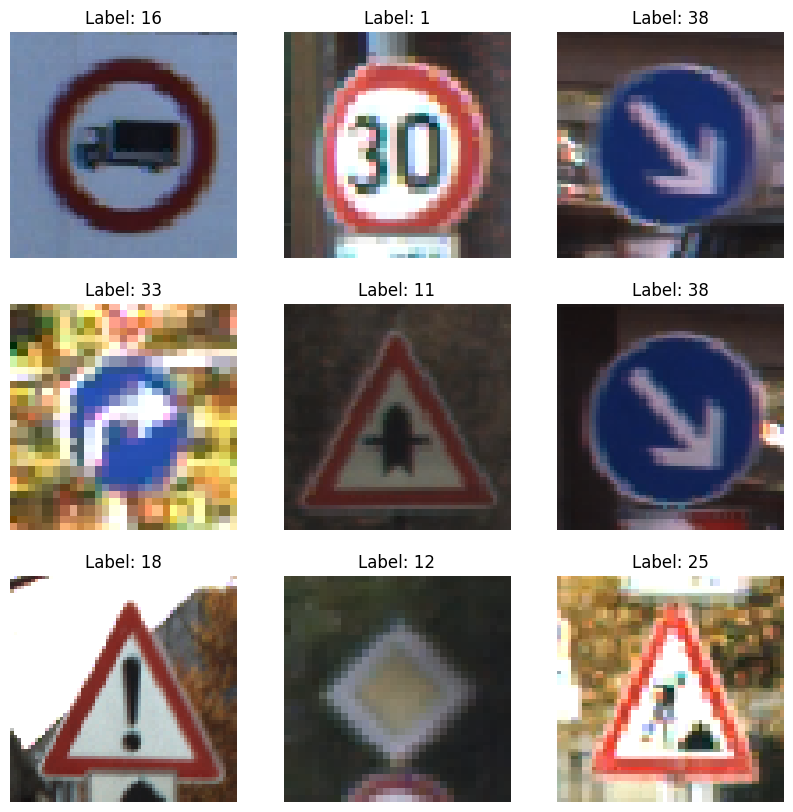

In [240]:
import matplotlib.pyplot as plt
# %% Plotting the images with the label:
train_selector = next(test_generator)

print(f'The size of the train images: {train_selector[0].shape}')
numbers = 9 # Any perfect square number
i = 1

plt.figure(figsize=(10, 10))

for (label, image) in enumerate(train_selector[0][: numbers]):
    plt.subplot(np.sqrt(numbers).astype('int64'), np.sqrt(numbers).astype('int64'), i)
    plt.title(f'Label: {labels[np.argmax(train_selector[1][label])]}')
    plt.imshow(image.astype('int64'))
    plt.axis('off')
    i += 1
plt.show()

In [241]:
test_generator.reset()
pred=model.predict(test_generator,
verbose=1)

  3/198 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step

/mnt/Files/Sorbonne_Data_Analytics_SDA/Cours/Deep_Learning_Dafnis-Krasniqi/Road_Signs_Deep_Learning_Classification/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step


In [242]:
pred.shape

(12630, 43)

In [243]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([ 8,  1, 32, ..., 39, 40,  2])

In [244]:
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [245]:
predictions

['16',
 '1',
 '38',
 '33',
 '11',
 '38',
 '18',
 '12',
 '25',
 '35',
 '40',
 '7',
 '23',
 '8',
 '4',
 '9',
 '11',
 '20',
 '27',
 '38',
 '4',
 '33',
 '9',
 '3',
 '1',
 '11',
 '13',
 '10',
 '9',
 '11',
 '5',
 '17',
 '34',
 '23',
 '2',
 '17',
 '3',
 '12',
 '16',
 '8',
 '7',
 '30',
 '18',
 '12',
 '24',
 '25',
 '3',
 '10',
 '18',
 '8',
 '25',
 '13',
 '15',
 '9',
 '13',
 '35',
 '5',
 '26',
 '9',
 '7',
 '38',
 '10',
 '4',
 '9',
 '15',
 '9',
 '18',
 '2',
 '5',
 '28',
 '11',
 '25',
 '30',
 '34',
 '5',
 '12',
 '5',
 '10',
 '25',
 '25',
 '21',
 '33',
 '25',
 '7',
 '10',
 '35',
 '3',
 '7',
 '22',
 '13',
 '3',
 '1',
 '2',
 '14',
 '12',
 '32',
 '3',
 '38',
 '9',
 '33',
 '0',
 '10',
 '5',
 '11',
 '33',
 '4',
 '35',
 '25',
 '33',
 '4',
 '1',
 '14',
 '16',
 '10',
 '23',
 '3',
 '27',
 '29',
 '1',
 '17',
 '13',
 '7',
 '1',
 '8',
 '2',
 '10',
 '10',
 '20',
 '1',
 '6',
 '36',
 '3',
 '14',
 '13',
 '11',
 '10',
 '18',
 '40',
 '2',
 '38',
 '41',
 '4',
 '6',
 '18',
 '17',
 '20',
 '2',
 '41',
 '11',
 '21',
 '7'

In [250]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score
print(classification_report(test_df['ClassId'], predictions))
print("Accuracy: ", accuracy_score(test_df['ClassId'], predictions))
print("Precision: ", precision_score(test_df['ClassId'], predictions, average='weighted'))
print("Recall: ", recall_score(test_df['ClassId'], predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        60
           1       0.99      0.93      0.96       720
          10       1.00      0.96      0.98       660
          11       0.91      0.99      0.95       420
          12       0.99      0.96      0.98       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       1.00      0.99      0.99       210
          16       1.00      0.68      0.81       150
          17       1.00      0.94      0.97       360
          18       0.99      0.90      0.94       390
          19       0.98      0.82      0.89        60
           2       0.97      0.99      0.98       750
          20       0.56      0.98      0.72        90
          21       0.80      0.90      0.85        90
          22       1.00      0.78      0.88       120
          23       0.88      0.97      0.92       150
          24       0.92    

In [247]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_df['ClassId'], predictions)

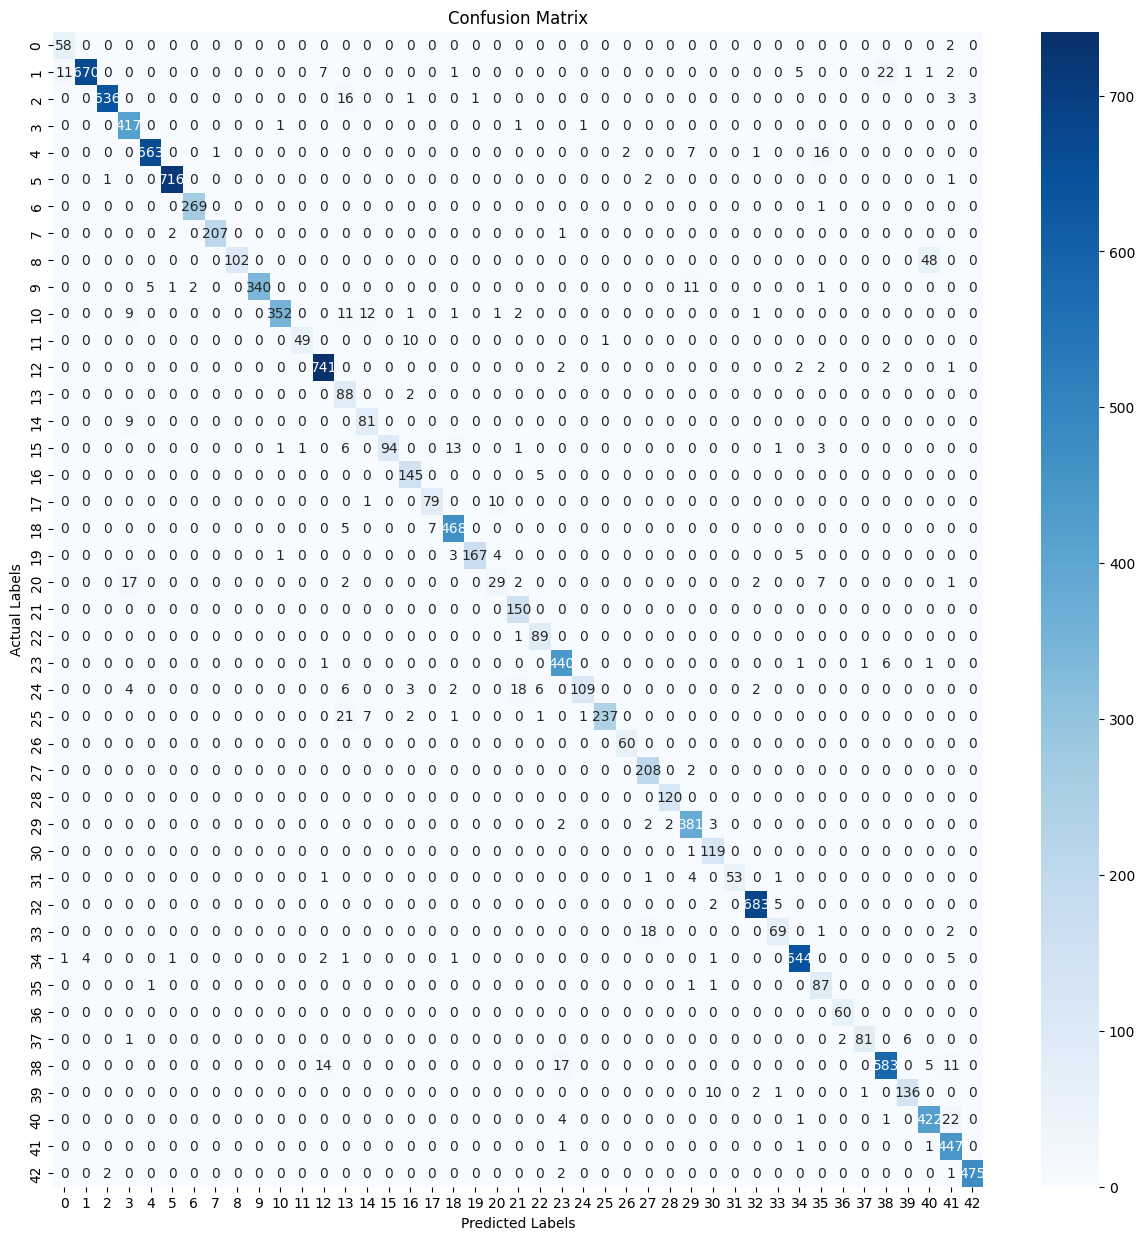

In [248]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()